GSAPP PLA6113 Wednesday February 23rd, 2022<br>
Exploring Urban Data with ML
# Clustering
# K-Means Clustering
__Definition:__<br>
* k-means clustering partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. 
* This results in a partitioning of the data space into Voronoi cells. 
* k-Means minimizes within-cluster variances (squared Euclidean distances)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

!pip install geopandas

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

     |████████████████████████████████| 1.0 MB 17.4 MB/s 
     |████████████████████████████████| 16.7 MB 356 kB/s 
     |████████████████████████████████| 6.3 MB 51.0 MB/s 


# 1. Simple example
### (1) Load module and create random dataset

In [ ]:
from sklearn.datasets import make_blobs

If you have data points...with feature information and without label or target

You need to Cluster method, make buckets, and assign a categorical variable.

Clustering: 
- partitions data into groups

Similarity is defined using a distance measure
Using mostly **Euclidean distance**

Goal of Clustering: Partioning data in 
1. Maximally homogenuous
2. Maximally distinguished subsets

Examples:
- Cluster customers based on their purchase histories
- ...Neiborhood level evacuation and recovery patterns in Houston, Texas 


Clustering Algo
Partioning-data points are set to certain groups
- K-Means Clustering: Find cluster centers that are representative of certain regions of the data. Assigns each data point to the closest cluster center. Set each cluster center as the mean of the data points that are assigned to it.
Step 1: 
1. Specify how many clusters you are looking for
2. Choose K Cluster centers
3. Random points in the data space are assigned 

Step 2: 
1. Calculate which center each datapoint is closest to
2. Each data point is assigned to the cluster center it is closest to

Step 3: 
1. Calculate the new centers as means of the assigned clusters
2. Iterate Step 2 and 3 until convergence
3. Stop when cluster centers and assigned results no longer change

Deterministic approaches
Hierarchal
- Agglomerative Clustering

Density based
- DBSCAN


In [ ]:
# create dataset (even though we will use only X, which is input features, but it comes with y variable from make_blobs)
X, y = make_blobs(
   n_samples=150, n_features=2, # create (150,2) shape data points - in other words, 150 rows and 2 columns
   centers=3, cluster_std=0.5,
   shuffle=True, random_state=0
)

In [ ]:
print (X.shape)

(150, 2)


Text(0.5, 1.0, 'Scatter plot - two dimensional data')

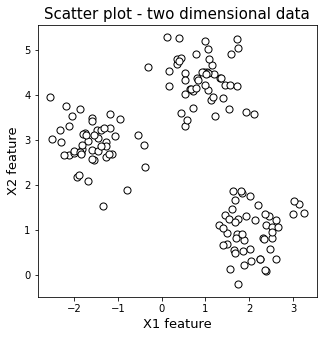

In [ ]:
# Plot X (two dimensional data)
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1],
           c='white', marker='o',
           edgecolor='black', s=50)

plt.xlabel('X1 feature', fontsize=13)
plt.ylabel('X2 feature', fontsize=13)
plt.title('Scatter plot - two dimensional data', fontsize=15)

#there's three groups clustered

### (2) What is your intuitive 'K' here? Decide an initial K for K-Means clustering

### (3) Load module

You can find various clustering algorithms privded by sklearn here (https://scikit-learn.org/stable/modules/clustering.html)

In [ ]:
from sklearn.cluster import KMeans

### (4) Apply K-Means clustering algorithm to the sample dataset

Reference: https://scikit-learn.org/stable/modules/clustering.html#k-means

Syntax:
    
    YOUR_CLUSTERING_MODEL_NAME = KMeans(n_clusters=k, n_init=10, random_state=None)
    
    n_clusters int, default=8
    - The number of clusters to form as well as the number of centroids to generate.
    
    n_init int, default=10
    - Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
    
    random_state int, RandomState instance, default=None
    Determines random number generation for centroid initialization.(for reproducibility)

#### Build your K-Means clustering model

In [ ]:
km=KMeans(n_clusters=3, random_state=0) #random statements equal 0

#### Fit to your data to partition data points into certain groups

In [ ]:
group_km=km.fit_predict(X)
print(group_km)


[0 2 2 2 0 2 2 0 1 2 0 1 1 2 2 1 1 0 1 0 2 0 2 2 1 0 0 2 1 0 1 1 1 1 2 0 0
 0 2 2 1 1 2 0 0 0 1 2 1 2 0 2 2 0 0 1 2 0 1 2 1 1 1 1 2 1 2 0 2 2 2 0 0 2
 0 2 2 1 1 2 0 0 2 2 0 0 0 1 1 0 0 2 0 2 0 2 1 1 0 0 0 0 1 0 0 2 1 2 2 2 1
 2 0 1 2 1 2 2 1 1 2 0 2 2 0 0 1 0 1 1 1 1 0 1 1 1 2 1 0 1 2 2 0 0 1 1 1 1
 0 0]


#### Check the centroids of the clusters

In [ ]:
print(km.cluster_centers_) #3 vectors

[[ 2.06521743  0.96137409]
 [-1.5947298   2.92236966]
 [ 0.9329651   4.35420712]]


### (5) Plot with clustering result

Text(0.5, 1.0, 'Scatter plpt-K means clustering results')

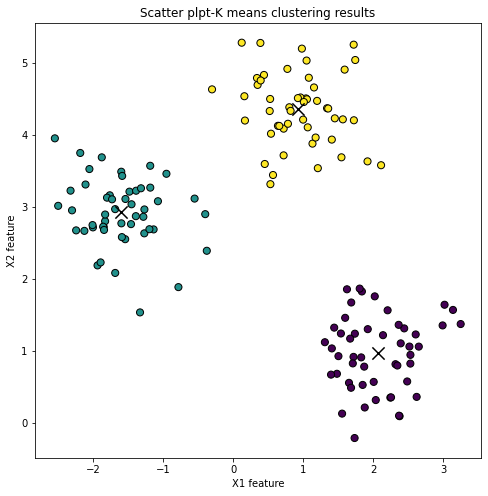

In [ ]:
# Plot X (two dimensional data) with different colors based on clustering labels
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], c=group_km, marker='o', edgecolor='black', s=50)

# Plot the centroids of the clusters
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker='x', s=150, color='black')
plt.title("scatter plot")

plt.xlabel('X1 feature')
plt.ylabel('X2 feature')
plt.title("Scatter plpt-K means clustering results")


## Label groups/clusters
### a. Using a colorbar - this is the simplest way but it's tricky to show 'discrete' labels.

Text(0.5, 1.0, 'Scatter plot - two dimensional data')

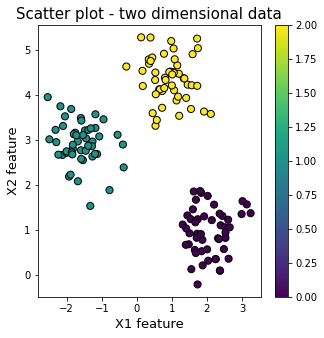

In [ ]:
# Plot X (two dimensional data) with different colors based on clustering labels
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1],
           c=group_km, 
           marker='o',
           edgecolor='black', s=50,
           )

plt.colorbar()

# Plot the centroids of the clusters
# plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],
#            s=150, marker='x',
#            color='k')

plt.xlabel('X1 feature', fontsize=13)
plt.ylabel('X2 feature', fontsize=13)
plt.title('Scatter plot - two dimensional data', fontsize=15)

### b. Create scatter plots iterratively

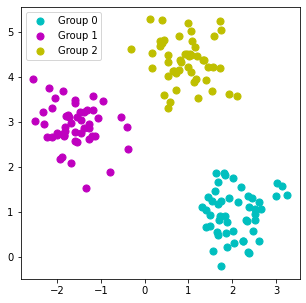

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(X[group_km==0, 0], X[group_km==0, 1], s=50, c='c', label ='Group 0')
plt.scatter(X[group_km==1, 0], X[group_km==1, 1], s=50, c='m', label ='Group 1')
plt.scatter(X[group_km==2, 0], X[group_km==2, 1], s=50, c='y', label ='Group 2')
plt.legend()

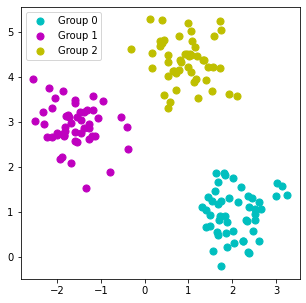

In [ ]:
# or you can use for loops

colors = ['c', 'm', 'y'] # you can use any other colors

plt.figure(figsize=(5,5))
for i in [0,1,2]:
    plt.scatter(X[group_km==i, 0], X[group_km==i, 1], s=50, c=colors[i], label ='Group %s'%(i))
plt.legend()

### c) Create dataframe and then create scatter plots iterratively
* You need to firstly create pandas dataframe to store your features and label from the clustering result

In [ ]:
df = pd.DataFrame()
df['x1'] = X[:,0]
df['x2'] = X[:,1]
df['label'] = group_km

Text(0.5, 1.0, 'Scatter plot - two dimensional data')

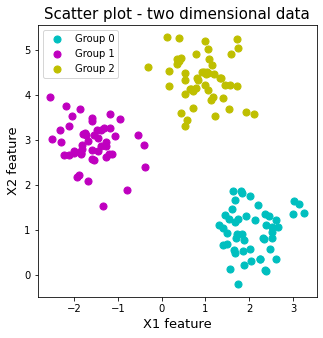

In [ ]:
# Plot X (two dimensional data) with different colors based on clustering labels
plt.figure(figsize=(5,5))
plt.scatter(df['x1'][df['label']==0], df['x2'][df['label']==0], 
            c='c', marker='o', s=50, label='Group 0') # scatter plot of group 0
plt.scatter(df['x1'][df['label']==1], df['x2'][df['label']==1], 
            c='m', marker='o', s=50, label='Group 1') # scatter plot of group 1
plt.scatter(df['x1'][df['label']==2], df['x2'][df['label']==2], 
            c='y', marker='o',  s=50, label='Group 2') # scatter plot of group 2

plt.legend()

plt.xlabel('X1 feature', fontsize=13)
plt.ylabel('X2 feature', fontsize=13)
plt.title('Scatter plot - two dimensional data', fontsize=15)

Text(0.5, 1.0, 'Scatter plot - two dimensional data')

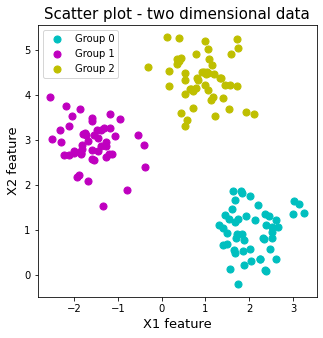

In [ ]:
# or you can use for loops here as well

colors = ['c', 'm', 'y'] # if you define your color list above, you don't need to specify again

plt.figure(figsize=(5,5))
for i in [0,1,2]:
    plt.scatter(df['x1'][df['label']==i], df['x2'][df['label']==i], 
            c=colors[i], marker='o', s=50, label='Group %s'%(i))
plt.legend()

plt.xlabel('X1 feature', fontsize=13)
plt.ylabel('X2 feature', fontsize=13)
plt.title('Scatter plot - two dimensional data', fontsize=15)

### d) Using seaborn module (which is a python module for plotting)
* fit_reg parameter should be _False_ - if True, fitted lines will be shown

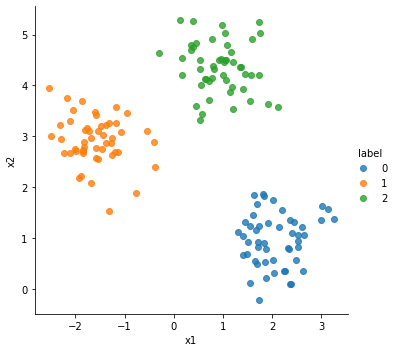

In [ ]:
import seaborn as sns
sns.lmplot(data=df, x='x1', y='x2', hue='label', fit_reg=False, legend=True)

### (6) What if we don't have any idea about 'K'? 
#### Let's use the elbow method to determine the optimal number of cluster _k_

In [ ]:
wss=[] #create a loop to make 4 cycles

for i in range(1,11):
  km=KMeans(n_clusters=i,
            random_state=0)
  km.fit(X)
  wss.append(km.inertia_)

In [ ]:
print(wss)

[713.6998289434158, 283.4610178020931, 72.47601670996696, 62.8406176854222, 53.87202688131045, 47.03725972751367, 41.18648970744077, 35.40607032359241, 30.246853895434104, 27.766482866006285]


Text(0.5, 1.0, 'Elbow Method')

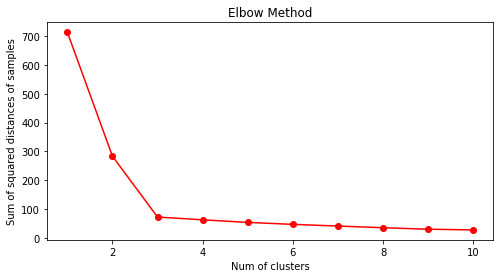

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(range(1,11), wss, marker='o', c='red')
plt.xlabel("Num of clusters")
plt.ylabel("Sum of squared distances of samples")
plt.title("Elbow Method")

#line represent line 1 through 10 

#### Let's use the Silhoutte method to determine the optimal number of cluster k

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
s_avg=[]

for i in range(2,11):
  km=KMeans(n_clusters=i, random_state=0)
  y_km=km.fit_predict(X)
  s_avg.append(silhouette_score(X, y_km))

In [ ]:
s_avg

[0.5848706144251782,
 0.7143417887288687,
 0.5768508858868746,
 0.44772656258809407,
 0.324958375651427,
 0.3194955277398343,
 0.33797787740062657,
 0.3477912938132486,
 0.35309019356011834]

Text(0.5, 1.0, 'Silhoutte test')

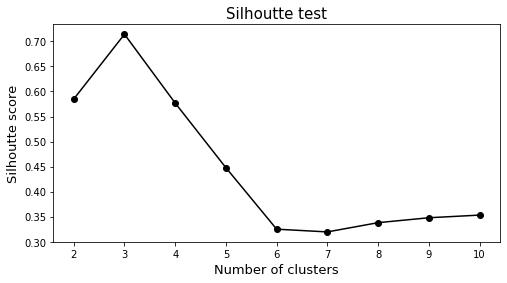

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(range(2,11), s_avg, marker='o', c='k')

plt.xlabel('Number of clusters', fontsize=13)
plt.ylabel('Silhoutte score', fontsize=13)
plt.title('Silhoutte test', fontsize=15)

# 2. Real world data example
## Neighborhood clustering based on demographic/socioeconomic chatacteristics

### 1) Load data
* Zipcode (modified by the city government) with racial/ethnic information

In [ ]:
data = pd.read_csv('/content/zipcode_race.csv', dtype={'MODZCTA':str})
data.head()

,MODZCTA,White,Black,Asian,Hispanic
0,10001,55.105,3.08,38.945,7.08
1,10002,32.230,8.38,41.460,27.19
2,10003,75.910,5.81,13.480,8.24
3,10004,62.810,1.68,30.450,3.70
4,10005,73.420,2.50,16.950,6.88


### 2) Take input variables

In [ ]:
#makes some groups based on race and diversity

X=data.iloc[:,1:]

### 3) Scale input variables
* It's ok with working on raw variables because four features have the same scale (percentile, 0 to 100, 0 to 1, etc.).
* But, you will need standardization if scales vary.

In [ ]:
from sklearn.preprocessing import StandardScaler # z-score standardization (mean=0, std=1)

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

#standardize data

### 4) Apply K-Means clustering algorithm

In [ ]:
km=KMeans(n_clusters=3) #making cluster groups to account for the diverse groups

In [ ]:
group_km=km.fit_predict(X_scaled)

In [ ]:
group_km

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 1, 2, 2, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 2, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 2, 0, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 1, 1, 1, 0, 0,
       0], dtype=int32)

### 5) Add clustering labels to the initial dataframe and visualize

In [ ]:
data['group']=group_km
data.head()

,MODZCTA,White,Black,Asian,Hispanic,group
0,10001,55.105,3.08,38.945,7.08,0
1,10002,32.230,8.38,41.460,27.19,0
2,10003,75.910,5.81,13.480,8.24,0
3,10004,62.810,1.68,30.450,3.70,0
4,10005,73.420,2.50,16.950,6.88,0


In [ ]:
zipcode=gpd.read_file("/content/data_export (1).zip")

DriverError: ignored

In [ ]:
result=pd.merge(zipcode, data, on='M0DZCTA', how='left')

NameError: ignored

In [ ]:
result.plot(column='group')

### 6) Identify the optimized number of clustered groups

In [ ]:
# Use for loops 
# Create an empty list to store total within sum of square values of each loop
wss = []

for i in range(1, 11):
    km = KMeans(
        n_clusters=i,
        n_init=10, random_state=0
    )
    km.fit(X_scaled)
    wss.append(km.inertia_) # calculate sum of squared distances of samples to their closest cluster center and append to the list

# plot the elbow test results
plt.figure(figsize=(8,4))
plt.plot(range(1, 11), wss, marker='o', c='k')

plt.xlabel('Number of clusters', fontsize=13)
plt.ylabel('Sum of squared distances of samples', fontsize=13)
plt.title('Elbow test', fontsize=15)

In [ ]:
# Use for loops 
# Create an empty list to store a Silhoutte score of each loop
silhoutte_avg = []

for i in range(2, 11): # Make sure silhoutte score can be calculated with at least 2 clusters
    km = KMeans(
        n_clusters=i,
        n_init=10, random_state=0
    )
    y_km = km.fit_predict(X_scaled)
    silhoutte_avg.append(silhouette_score(X_scaled, y_km)) # calculate a Silhoutte score and append to the list
    
# plot the Silhoutte test results
plt.figure(figsize=(8,4))
plt.plot(range(2, 11), silhoutte_avg, marker='o', c='k')

plt.xlabel('Number of clusters', fontsize=13)
plt.ylabel('Silhoutte score', fontsize=13)
plt.title('Silhoutte test', fontsize=15)

### 7) Try clustering again based on the optimal K

In [ ]:
result[['White', 'Black', 'Asian', 'Hispanic', 'group']].groupby('group').mean()

What kind of problem am I going to solve?

Supervised and Unsupervised? Regression, Classification or Clustering problems  (Unsupervised)?

Examples: 
1. Predicting Waste Generation and Recycling in NYC
2. Predicting Higher Resolution Air Quality in NYC
3. Predicting Heating Risk of Multifamily Housing in NYC (Who did this!??!Bo did this! 1 is higher probability of having issues 0 is less probability)
4. Identifying At-Risk Homeless Families in NYC